# Machine Learning on Mushroom Toxicity

### Description of Dataset

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class).

### Variables

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).

Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

### Objectives

Identify what features are most commonly associated with poisonous and non-poisonous mushrooms.




## Step 1: Data Cleaning & Preprocessing

In [29]:
# Import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, balanced_accuracy_score, precision_recall_curve, auc, accuracy_score
from sklearn.tree import export_graphviz
from sklearn import tree
import sys
!{sys.executable} -m pip install pydotplus
import pydotplus
from IPython.display import Image
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import data
mushrooms = pd.read_csv('Resources/secondary_data_shuffled.csv', sep=';')

In [32]:
# Check the data
mush_cols = mushrooms.columns.to_list()

print(mush_cols)

print(mushrooms.shape)

mushrooms.head()

['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
(61069, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,1.26,x,g,y,f,d,NaN,w,5.04,...,NaN,t,y,NaN,NaN,f,f,NaN,d,a
1,e,10.32,f,e,b,f,NaN,c,b,4.68,...,NaN,NaN,w,NaN,NaN,t,f,NaN,d,a
2,p,0.92,x,g,p,f,a,NaN,p,4.59,...,NaN,h,k,NaN,NaN,f,f,NaN,d,u
3,p,4.27,x,NaN,p,f,x,NaN,w,4.55,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,...,NaN,NaN,w,NaN,NaN,f,f,NaN,m,a


In [33]:
# The data must be cleaned, normalized, and standardized prior to modeling 
clean = mushrooms.dropna(axis=1)


clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  habitat               61069 non-null  object 
 11  season                61069 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


## Step 2: Data Exploration & Visualization

### How do cap characteristics influence mushroom toxicity?

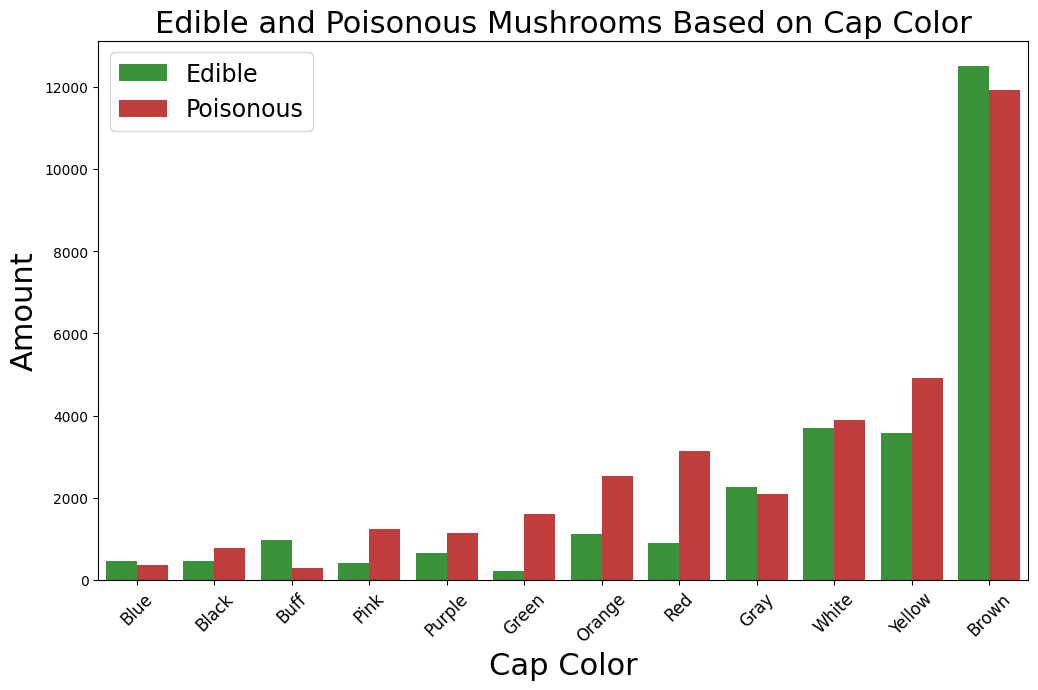

In [34]:
# Check how cap color influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="cap-color", 
    hue="class", 
    order=clean['cap-color'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Cap Color",fontsize=22)

# Set y-axis
ax.set_ylabel('Amount',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('Blue',
     'Black',
     'Buff',
     'Pink',
     'Purple',
     'Green',
     'Orange',
     'Red',
     'Gray',
     'White',
     'Yellow',
     'Brown'
     ),
     fontsize = 12,
     rotation = 45)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=17)

Buff mushrooms appear to be the least likely to poison you. You are almost guaranteed to be poisoned by a pink, green, orange, red, or yellow mushroom. Other colors appear to be a toss-up as to whether they are poisonous or not. Best to assume more mushrooms you find in the wild are poisonous.

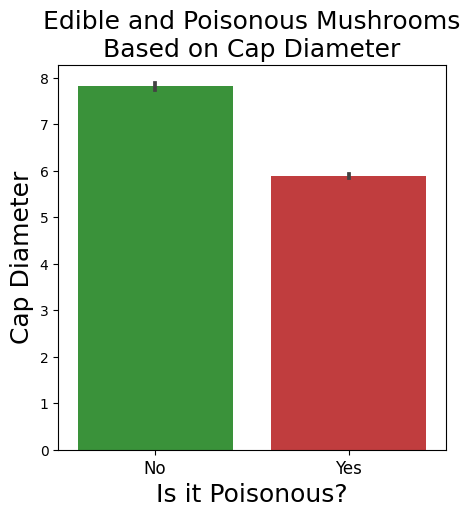

In [ ]:
# Check how cap diameter influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(5,5))

# Plot data
sns.barplot(data=clean, 
            x="class", 
            y="cap-diameter", 
            hue="class",
            palette={
                "e":palette[2], 
                "p":palette[3]
                },
            dodge=False,
            estimator=np.mean
            )

# Set x-axis
ax.set_xlabel("Is it Poisonous?",fontsize=18)

# Set y-axis
ax.set_ylabel('Cap Diameter',fontsize=18)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Cap Diameter',fontsize=18)

# Set x-labels
ax.set_xticklabels(
    ('No',
     'Yes'
     ),fontsize = 12)

# Remove legend
ax.legend([],[], frameon=False)


It appears that the bigger a mushroom cap is, the less likely it is to be poisonous.

### How do stem characteristics influence mushroom toxicity?

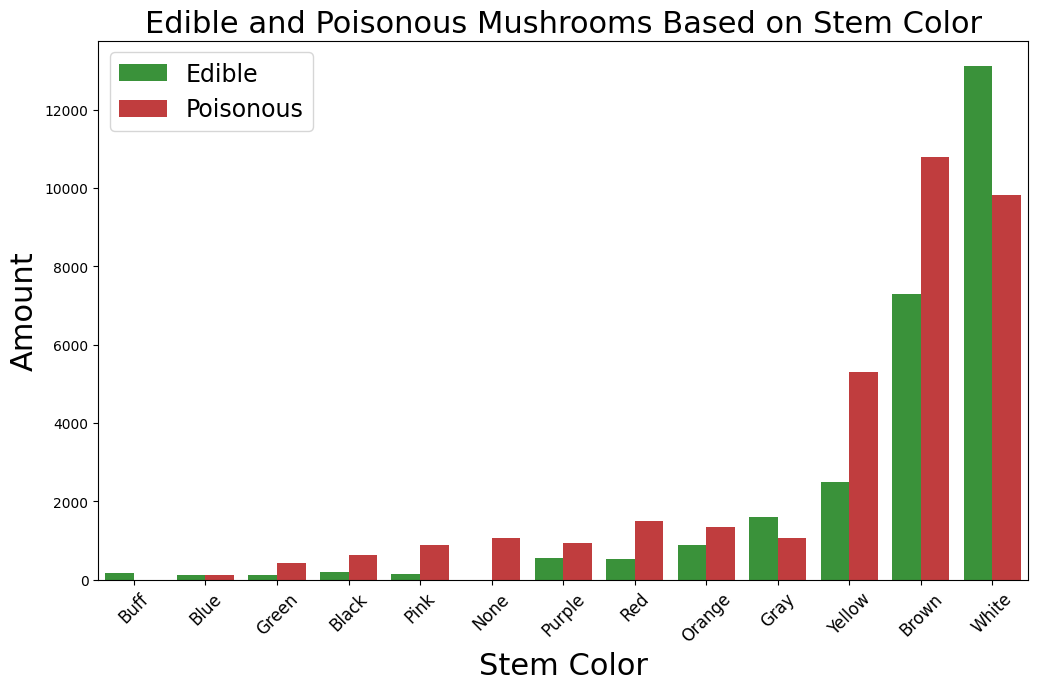

In [ ]:
# Check how stem color influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="stem-color", 
    hue="class", 
    order=clean['stem-color'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Stem Color",fontsize=22)

# Set y-axis
ax.set_ylabel('Amount',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms Based on Stem Color',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('Buff',
     'Blue',
     'Green',
     'Black',
     'Pink',
     'None',
     'Purple',
     'Red',
     'Orange',
     'Gray',
     'Yellow',
     'Brown',
     'White'
     ),
     fontsize = 12,
     rotation = 45)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=17)

Mushrooms with buff stems appear to almost always be edible. Mushrooms with white stems are also less likely to be poisonous. Stear clear of all other stem colors, however, as they are likely to be poisonous.

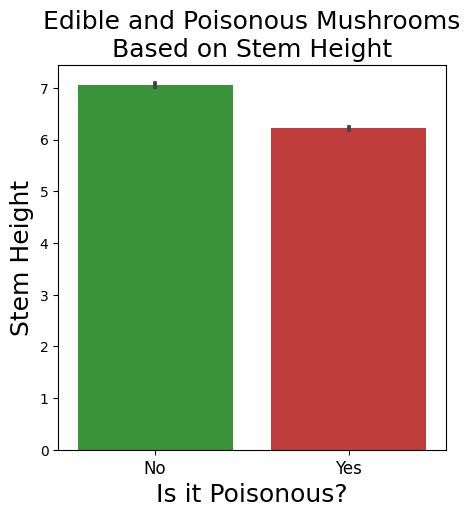

In [ ]:
# Check how stem height influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(5,5))

# Plot data
sns.barplot(data=clean, 
            x="class", 
            y="stem-height", 
            hue="class",
            palette={
                "e":palette[2], 
                "p":palette[3]
                },
            dodge=False,
            estimator=np.mean
            )

# Set x-axis
ax.set_xlabel("Is it Poisonous?",fontsize=18)

# Set y-axis
ax.set_ylabel('Stem Height',fontsize=18)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Stem Height',fontsize=18)

# Set x-labels
ax.set_xticklabels(
    ('No',
     'Yes'
     ),fontsize = 12)

# Remove legend
ax.legend([],[], frameon=False)

It appears that taller stemmed mushrooms are less likely to be poisonous.

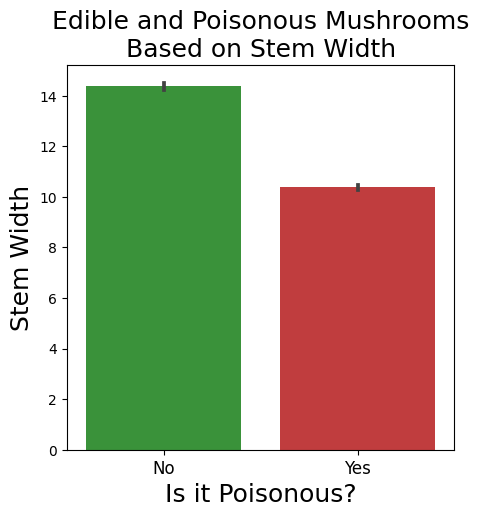

In [ ]:
# Check how stem width influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(5,5))

# Plot data
sns.barplot(data=clean, 
            x="class", 
            y="stem-width", 
            hue="class",
            palette={
                "e":palette[2], 
                "p":palette[3]
                },
            dodge=False,
            estimator=np.mean
            )

# Set x-axis
ax.set_xlabel("Is it Poisonous?",fontsize=18)

# Set y-axis
ax.set_ylabel('Stem Width',fontsize=18)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Stem Width',fontsize=18)

# Set x-labels
ax.set_xticklabels(
    ('No',
     'Yes'
     ),fontsize = 12)

# Remove legend
ax.legend([],[], frameon=False)


Mushrooms with wider stems appear to be less likely to be poisonous.

### How do gill characteristics influence mushroom toxicity?

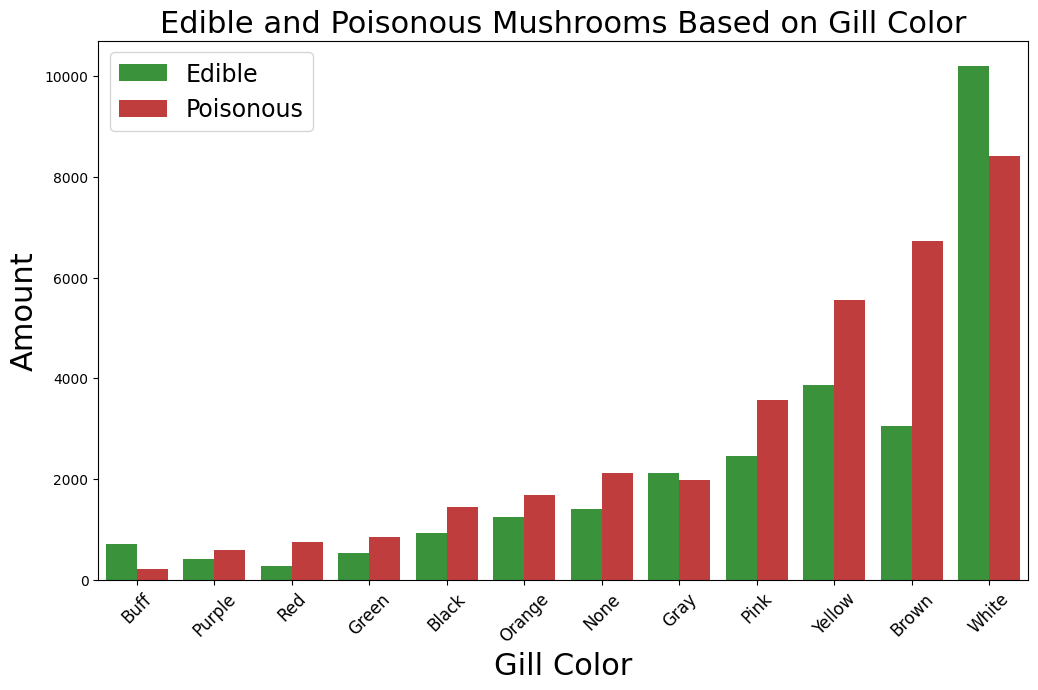

In [ ]:
# Check how gill color influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="gill-color", 
    hue="class", 
    order=clean['gill-color'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Gill Color",fontsize=22)

# Set y-axis
ax.set_ylabel('Amount',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms Based on Gill Color',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('Buff',
     'Purple',
     'Red',
     'Green',
     'Black',
     'Orange',
     'None',
     'Gray',
     'Pink',
     'Yellow',
     'Brown',
     'White'
     ),
     fontsize = 12,
     rotation = 45)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=17)

Mushrooms with white and buff gills appear to be less poisonous. Brown-, yellow-, red-, and pink-gilled mushrooms appear to be especially poisonous.

### How does bleeding and bruising influence mushroom toxicity?

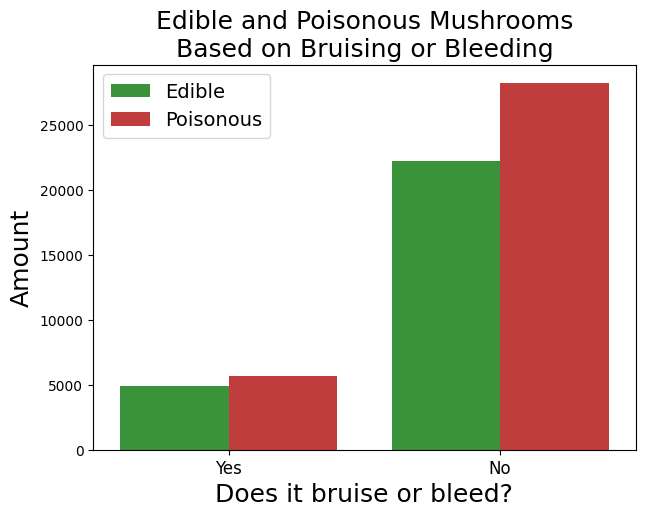

In [ ]:
# Check how bruising and bleeding influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(7,5))

# Plot data
sns.countplot(
    data=clean, 
    x="does-bruise-or-bleed", 
    hue="class", 
    order=clean['does-bruise-or-bleed'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Does it bruise or bleed?",fontsize=18)

# Set y-axis
ax.set_ylabel('Amount',fontsize=18)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Bruising or Bleeding',fontsize=18)

# Set x-labels
ax.set_xticklabels(
    ('Yes',
     'No'
     ),fontsize = 12)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=14)

It appears that you would have better luck not being poisoned by a mushroom that bleeds and/or bruises compared to one that doesn't, though you are likely to get poisoned regardless.

### How does habitat and season influence mushroom toxicity?

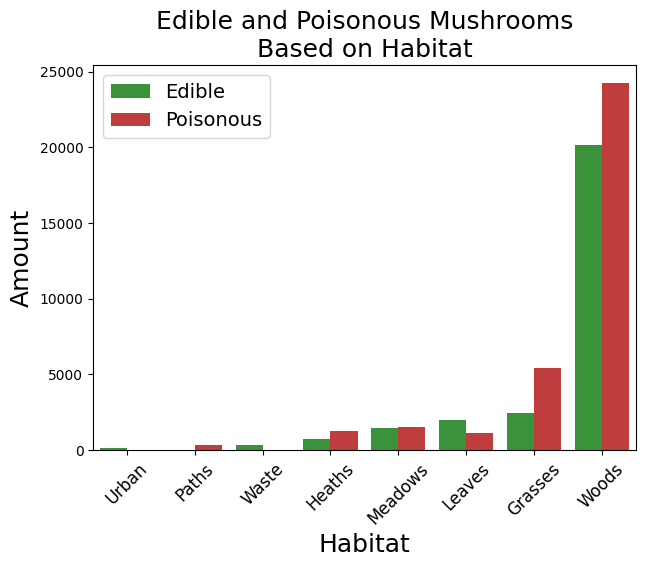

In [ ]:
# Check how habitat influence whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(7,5))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="habitat", 
    hue="class", 
    order=clean['habitat'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Habitat",fontsize=18)

# Set y-axis
ax.set_ylabel('Amount',fontsize=18)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Habitat',fontsize=18)

# Set x-labels
ax.set_xticklabels(
    ('Urban',
     'Paths',
     'Waste',
     'Heaths',
     'Meadows',
     'Leaves',
     'Grasses',
     'Woods'
     ),
     fontsize = 12,
     rotation = 45
     )

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=14)

Urban mushrooms appear to be less poisonous, although their representation in the dataset is minimal. Leaf mushrooms also appear to be less poisonous. Mushrooms found in grasses or woods, however, appear more likely to be poisonous.

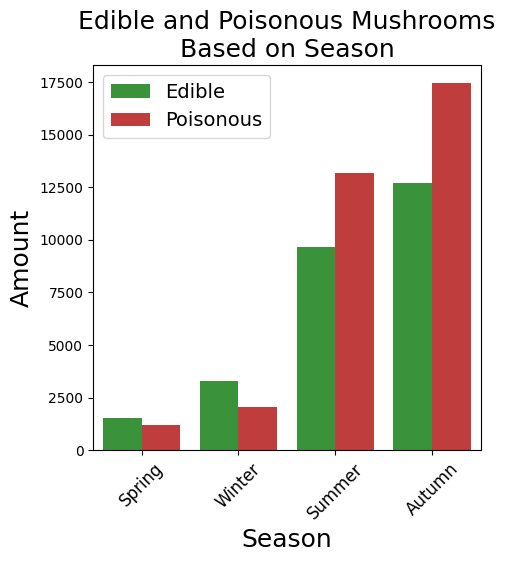

In [ ]:
# Check how season influence whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(5,5))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="season", 
    hue="class", 
    order=clean['season'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Season",fontsize=18)

# Set y-axis
ax.set_ylabel('Amount',fontsize=18)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Season',fontsize=18)

# Set x-labels
ax.set_xticklabels(
    ('Spring',
     'Winter',
     'Summer',
     'Autumn'
     ),
     fontsize = 12,
     rotation = 45
     )

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=14)

Most poisonous mushrooms can be found in the summer or autumn. You are less likely to find a poisonous mushroom in the Spring and Winter.

## Step 3: Predictive Analyses

### Data Transformation & Set-up

In [9]:
# Transform categorical variables to numbers
labelencoder_clean=LabelEncoder()
for column in clean.columns:
    clean[column] = labelencoder_clean.fit_transform(clean[column])
clean.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,84,6,11,0,10,394,119,12,0,0,0
1,0,990,2,0,0,0,358,1890,11,1,0,0
2,1,50,6,7,0,7,349,61,4,0,0,2
3,1,385,6,7,0,10,345,598,11,0,0,0
4,0,266,2,10,0,10,157,464,11,0,4,0


First, we code the discrete variables to numerics, then we separate out our response variable (poisonous or not) from the predictor variables (everything else).

In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = clean["class"]

# Separate the X variable, the features
X = clean.drop(columns="class")

In [ ]:
# Review the y variable Series
y.head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int32

In [ ]:
# Check the balance of our target values, O is edible 1 is poisonous
y.value_counts()

1    33888
0    27181
Name: class, dtype: int64

In [ ]:
# Review the X variable DataFrame
X.describe()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,617.029016,4.032635,6.139776,0.173410,7.340484,547.941263,1139.337209,8.423816,0.248555,0.623180,1.055233
std,426.728908,2.138335,3.165313,0.378605,3.175211,318.111912,894.856713,3.215143,0.432179,1.271238,1.101937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,307.000000,2.000000,5.000000,0.000000,5.000000,354.000000,466.000000,6.000000,0.000000,0.000000,0.000000
50%,547.000000,5.000000,5.000000,0.000000,7.000000,486.000000,964.000000,11.000000,0.000000,0.000000,1.000000
75%,812.000000,6.000000,10.000000,0.000000,10.000000,666.000000,1606.000000,11.000000,0.000000,1.000000,2.000000
max,2563.000000,6.000000,11.000000,1.000000,11.000000,2197.000000,4633.000000,12.000000,1.000000,7.000000,3.000000


If we don't apply scaling, the models will be more influenced by features such as cap shape and color and stem and gill color compared to features like bruises and whether the mushrooms has rings. This is because the former features have a greater impact due to their wider range of choices.

In [ ]:
# Create a correlation matrix
clean.corr()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
class,1.000000,-0.185401,-0.108724,0.026110,-0.019889,-0.061487,-0.114605,-0.197369,-0.095813,0.057559,-0.049540,-0.061439
cap-diameter,-0.185401,1.000000,0.147757,-0.000133,0.237696,0.232601,0.522804,0.804608,0.051477,0.116059,-0.130896,0.031579
cap-shape,-0.108724,0.147757,1.000000,0.020991,0.192546,0.114409,0.037486,0.169572,0.006356,0.035946,-0.123624,-0.020460
cap-color,0.026110,-0.000133,0.020991,1.000000,0.011434,0.132791,-0.017923,0.008342,0.262380,0.071216,0.027581,0.012157
does-bruise-or-bleed,-0.019889,0.237696,0.192546,0.011434,1.000000,0.023882,0.082551,0.217677,-0.023666,0.019195,-0.102834,-0.051611
gill-color,-0.061487,0.232601,0.114409,0.132791,0.023882,1.000000,0.159796,0.117822,0.144613,-0.055133,-0.079168,-0.003924
stem-height,-0.114605,0.522804,0.037486,-0.017923,0.082551,0.159796,1.000000,0.439350,0.137207,0.283902,-0.024568,-0.018035
stem-width,-0.197369,0.804608,0.169572,0.008342,0.217677,0.117822,0.439350,1.000000,0.083622,0.015006,-0.109901,0.010747
stem-color,-0.095813,0.051477,0.006356,0.262380,-0.023666,0.144613,0.137207,0.083622,1.000000,0.147226,0.044203,-0.016489
has-ring,0.057559,0.116059,0.035946,0.071216,0.019195,-0.055133,0.283902,0.015006,0.147226,1.000000,0.103805,0.035644


We can see from the correlation matrix that the features are mostly uncorrelated.

In [ ]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    )
X_train.shape

(45801, 11)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Principal Components Analysis

Original shape: (45801, 11)
Transformed Shape of PCA data: (45801, 2)


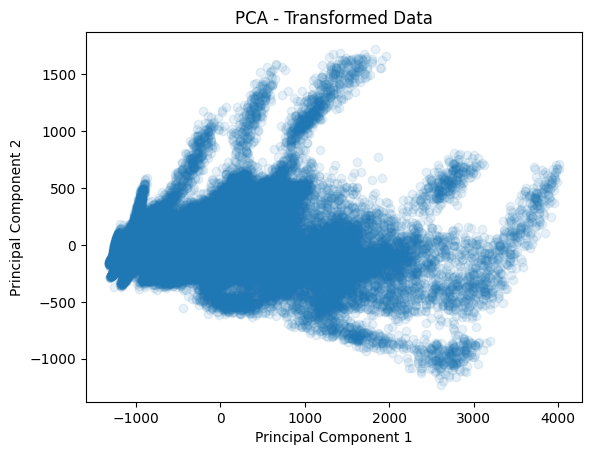

PCA1: 0.8769
PCA2: 0.0808


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original shape:", X_train.shape)
print("Transformed Shape of PCA data:", X_train_pca.shape)

# Plot the transformed data using a scatter plot(lower alpha allows for better visualization when there are overlapping points.)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],alpha=0.1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Transformed Data")
plt.show()
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratios for the first two principal components
print("PCA1:", '{:.4f}'.format(explained_variance_ratio[0]))
print("PCA2:", '{:.4f}'.format(explained_variance_ratio[1]))

We can see that the first principle components analysis had a high accuracy at 87%; whereas, the second principle components analysis have relatively low accuracy at 8%.

### Random Forest

In [ ]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Check to see model accuracies
print("Training accuracy:", 100*rf_model.score(X_train_scaled,y_train), "%")
print("Test Accuracy:", 100* rf_model.score(X_test_scaled,y_test), "%")

Training accuracy: 100.0 %
Test Accuracy: 99.59392192821588 %


In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6760,35
Actual 1,27,8446


Accuracy Score : 0.9959392192821588
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6795
           1       1.00      1.00      1.00      8473

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



True Positive (TP):  8446 
True Negative (TN):  6760 
False Positive (FP): 35 
False Negative (FN): 27 

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

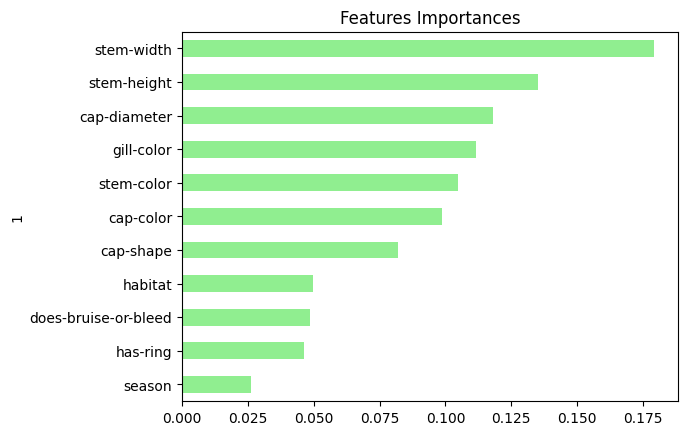

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

#### Create a Logistic Regression Model with the Original Data
Step 1: Fit a logistic regression model by using the training data (X_train and y_train).

In [ ]:

# Instantiate the Logistic Regression model
classifier = LogisticRegression(random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
# Print the balanced_accuracy score of the model
print(f"Original Data Accuracy Score: {balanced_accuracy_score(y_test, predictions)}")
# Generate a confusion matrix for the model
# Generate a confusion matrix for the model
test_matrix = confusion_matrix(y_test, predictions)
print(test_matrix)

Original Data Accuracy Score: 0.5755625865027525
[[2707 4088]
 [2095 6378]]


True Positive (TP): 6378
True Negative (TN): 2707
False Positive (FP): 4088
False Negative (FN): 2095

In [ ]:
# Print the classification report for the model
testing_report = classification_report(y_test, predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       0.56      0.40      0.47      6795
           1       0.61      0.75      0.67      8473

    accuracy                           0.60     15268
   macro avg       0.59      0.58      0.57     15268
weighted avg       0.59      0.60      0.58     15268



Accuracy: 60%
Class 0: Precision 56%, Recall 40%, F1-Score 47%
Class 1: Precision 61%, Recall 75%, F1-Score 67%
Weighted Average: Precision 59%, Recall 60%, F1-Score 58%

#### Predict a Logistic Regression Model with Over Resampled Training Data

In [ ]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_state = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_oversampler, y_oversampler = random_state.fit_resample(X_train, y_train)

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_oversampler = LogisticRegression(random_state=1)
classifier

# Fit the model using the resampled training data
classifier_oversampler.fit(X_oversampler, y_oversampler)

# Make a prediction using the testing data
oversampler_predictions = classifier_oversampler.predict(X_test)
# Print the balanced_accuracy score of the model 
print('OVER RESAMPLED TRAINING DATA')
print(f"Original Data Accuracy Score: {balanced_accuracy_score(y_test, oversampler_predictions)}")
# Generate a confusion matrix for the model
sampler_matrix = confusion_matrix(y_test, oversampler_predictions)
print(sampler_matrix)
# Print the classification report for the model
sampler_report = classification_report(y_test, oversampler_predictions)
print(testing_report)

OVER RESAMPLED TRAINING DATA
Original Data Accuracy Score: 0.5928342437697827
[[4038 2757]
 [3462 5011]]
              precision    recall  f1-score   support

           0       0.56      0.40      0.47      6795
           1       0.61      0.75      0.67      8473

    accuracy                           0.60     15268
   macro avg       0.59      0.58      0.57     15268
weighted avg       0.59      0.60      0.58     15268



True Positive (TP): 5011
True Negative (TN): 4038
False Positive (FP): 2757
False Negative (FN): 3462

Class 0 precision: 56%, recall: 40%, F1-score: 47%
Class 1 precision: 61%, recall: 75%, F1-score: 67%
Overall accuracy: 60%
Weighted average precision: 59%, recall: 60%, F1-score: 58%

#### Predict a Logistic Regression Model with Under Resampled Training Data

In [ ]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_state = RandomUnderSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_undersampler, y_undersampler = random_state.fit_resample(X_train, y_train)

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier_undersampler = LogisticRegression(random_state=1)
classifier

# Fit the model using the resampled training data
classifier_undersampler.fit(X_undersampler, y_undersampler)

# Make a prediction using the testing data
undersampler_predictions = classifier_undersampler.predict(X_test)
# Print the balanced_accuracy score of the model
print('Under Resampled Training Data') 
print(f"Original Data Accuracy Score: {balanced_accuracy_score(y_test, undersampler_predictions)}")
# Generate a confusion matrix for the model
undersampler_matrix = confusion_matrix(y_test, undersampler_predictions)
print(undersampler_matrix)
# Print the classification report for the model
undersampler_report = classification_report(y_test, undersampler_predictions)
print(testing_report)




Under Resampled Training Data
Original Data Accuracy Score: 0.5922959368750167
[[4078 2717]
 [3521 4952]]
              precision    recall  f1-score   support

           0       0.56      0.40      0.47      6795
           1       0.61      0.75      0.67      8473

    accuracy                           0.60     15268
   macro avg       0.59      0.58      0.57     15268
weighted avg       0.59      0.60      0.58     15268



True Positive (TP): 4952
True Negative (TN): 4078
False Positive (FP): 2717
False Negative (FN): 3521

Class 0 precision: 56%, recall: 40%, F1-score: 47%
Class 1 precision: 61%, recall: 75%, F1-score: 67%
Overall accuracy: 60%
Weighted average precision: 59%, recall: 60%, F1-score: 58%

### Decision Tree Model 

In [ ]:
 # Define features set
X = clean.copy()
X.drop("class", axis=1, inplace=True)
 # Define target vector
y = clean["class"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
 # Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
 # Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()
# Fit the model
model = model.fit(X_train_scaled, y_train) # Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [ ]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6688,129
Actual 1,127,8324


Accuracy Score : 0.9832329054231072
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6817
           1       0.98      0.98      0.98      8451

    accuracy                           0.98     15268
   macro avg       0.98      0.98      0.98     15268
weighted avg       0.98      0.98      0.98     15268



## Deep Neural Net
#### Data Preparation

In [11]:
# Split our preprocessed data into our features and target arrays
y = clean['class'].values
X = clean.drop(columns='class').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify=y)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Model

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 75

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1200      
                                                                 
 dense_19 (Dense)            (None, 75)                7575      
                                                                 
 dense_20 (Dense)            (None, 1)                 76        
                                                                 
Total params: 8,851
Trainable params: 8,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1432/1432 [==============================] - 3s 1ms/step - loss: 0.4258 - accuracy: 0.7981
Epoch 2/10
1432/1432 [==============================] - 2s 1ms/step - loss: 0.2367 - accuracy: 0.9081
Epoch 3/10
1432/1432 [==============================] - 3s 2ms/step - loss: 0.1629 - accuracy: 0.9406
Epoch 4/10
1432/1432 [==============================] - 2s 2ms/step - loss: 0.1245 - accuracy: 0.9574
Epoch 5/10
1432/1432 [==============================] - 2s 1ms/step - loss: 0.1024 - accuracy: 0.9650
Epoch 6/10
1432/1432 [==============================] - 2s 1ms/step - loss: 0.0873 - accuracy: 0.9706
Epoch 7/10
1432/1432 [==============================] - 2s 2ms/step - loss: 0.0756 - accuracy: 0.9741
Epoch 8/10
1432/1432 [==============================] - 3s 2ms/step - loss: 0.0683 - accuracy: 0.9763
Epoch 9/10
1432/1432 [==============================] - 3s 2ms/step - loss: 0.0625 - accuracy: 0.9789
Epoch 10/10
1432/1432 [==============================] - 2s 1ms/step - loss: 0.056

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

478/478 - 1s - loss: 0.0503 - accuracy: 0.9836 - 566ms/epoch - 1ms/step
Loss: 0.05030633509159088, Accuracy: 0.9836258888244629
